#**IMAGE COMPRESSION USING PCA**

**Using PCA for image compression**

An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.

The basic steps we'll follow:

1. Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). 

2. This is lossy compression, as we are discarding some of the information.

3. To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.

4. We'll see how good the reconstructed images are for different number of selecte components.

#**PYTHON CODE**

In [ ]:
#IMPORTING LIBRARIES
import os
import cv2 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

#**1. Read a RGB Image and Plot the Image**

(1800, 2880, 3)


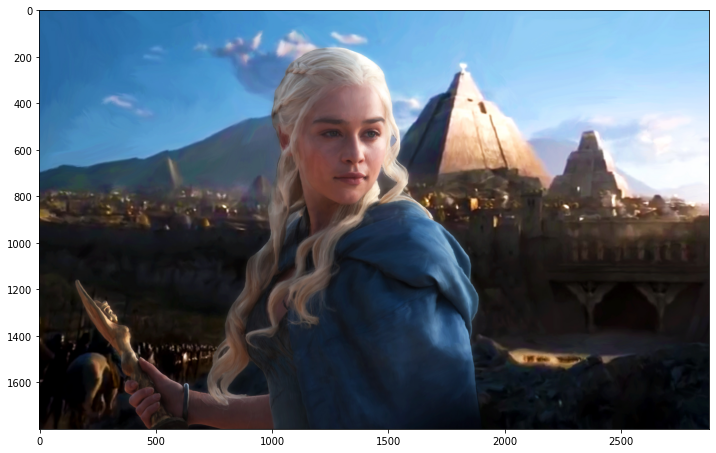

In [ ]:
image_raw = imread("/content/615340.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

#**2. Converting to greyscale**

1. Summing RGBs channel values for each pixel
2. Capping values to 1

We'll plot the matrix as a greyscale image.

(1800, 2880)
1.0


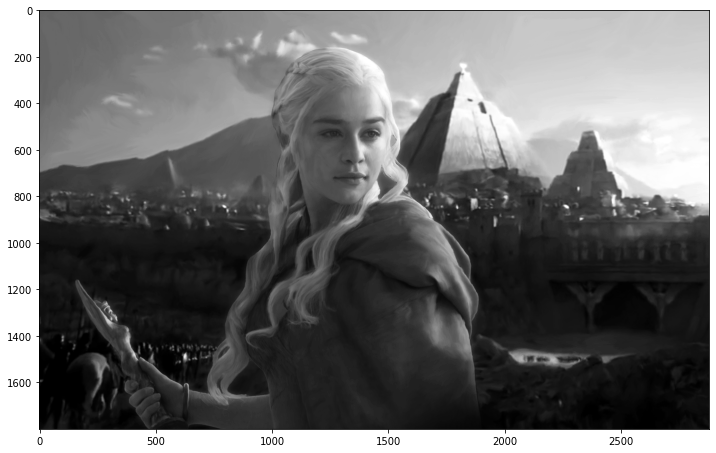

In [ ]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

#**3. Performing PCA on the image**

1. We'll perform PCA on the matrix with all the components.

2. We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture.

3. We'll pick a suitable number of components to represent the image for compression.

Number of components explaining 95% variance: 6


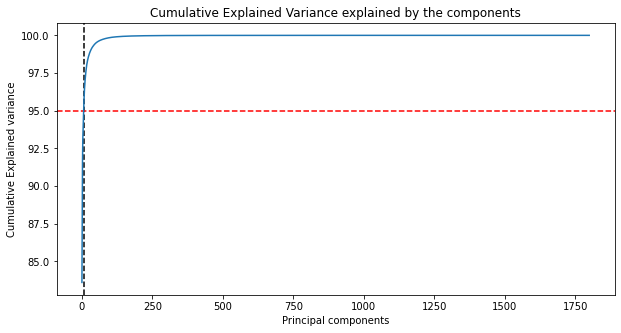

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Looks like 6 components, instead of 1800 pixels, can explain 95% of the variance in the image!

Let's reconstruct the image using only 6 components and see if the reconstructed image is visually very different from the original.

Reconstructing the b/w image with the limited number of components (6)

First, we'll use the fit_transform method from the IncrementalPCA module to first find the 6 PCs and transform and represent the data in those 6 new components/columns.

Next, we'll reconstruct the original matrix from these 6 components using the inverse_transform method.

We'll then plot the image to visually assess the quality of it.

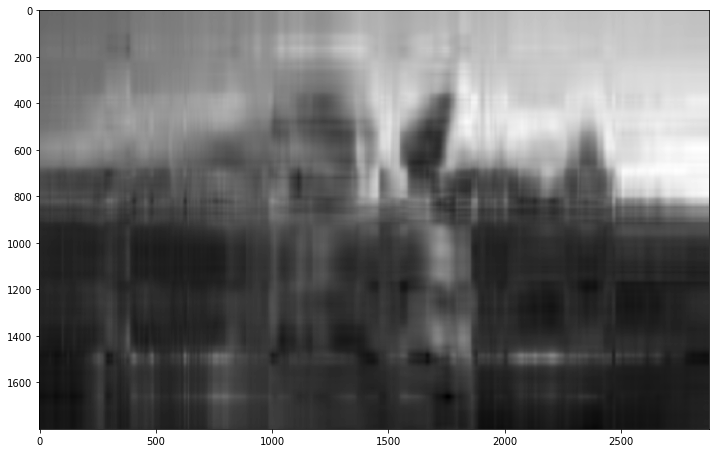

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

**Let's try out a different value of k - 150 components**

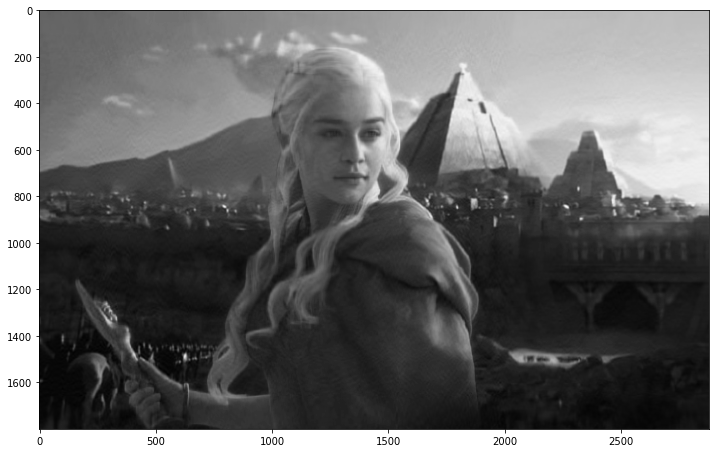

In [ ]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

**Reconstructing and plotting for different number of components**

We'll try out different number of components, begining from 5, ending at 250

We'll reconstruct the image at each k and plot the images

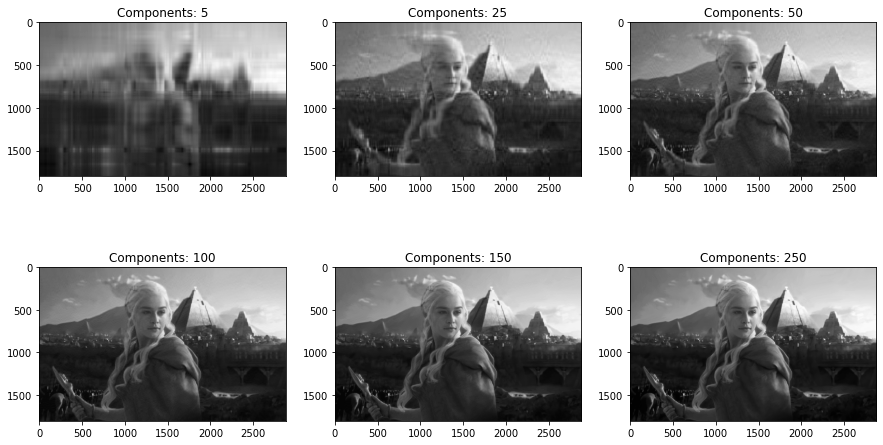

In [ ]:
ks = [5, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# **CONCLUSION**

We successfully implemented,

1. Implement PCA in python.

2. Choose the number of components using a scree plot

3. Reconstruct the original data from the components